In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("./data/train.csv", parse_dates=['datetime'])
test = pd.read_csv("./data/test.csv", parse_dates=['datetime'])

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


## 데이터 탐색/전처리

In [7]:
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

In [8]:
train.loc[:,'datetime-year':]

,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0
...,...,...,...,...,...,...
10881,2012,12,19,19,0,0
10882,2012,12,19,20,0,0
10883,2012,12,19,21,0,0
10884,2012,12,19,22,0,0


- 년도, 월, 날짜, 시간에 따라 자전거 대여 대수의 차이가 클까?

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1) year

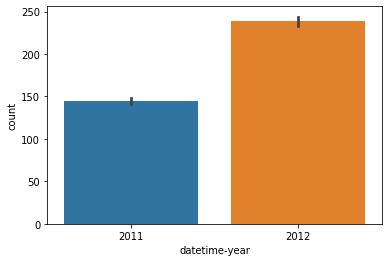

In [10]:
sns.barplot(data=train, x='datetime-year', y='count', estimator=np.mean) #estimator= np.mean 이 디폴트

- 11년도에 비해 12년도 대여횟수가 많다!

### 2) month

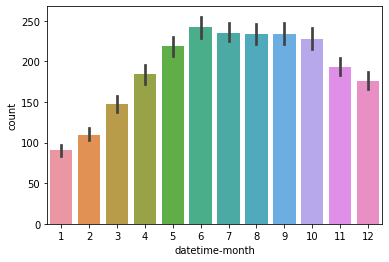

In [11]:
sns.barplot(data=train, x='datetime-month', y='count', estimator=np.mean)

### 3) day

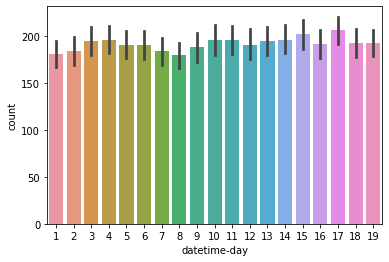

In [12]:
sns.barplot(data=train, x='datetime-day', y='count', estimator=np.mean)

### 4) hour

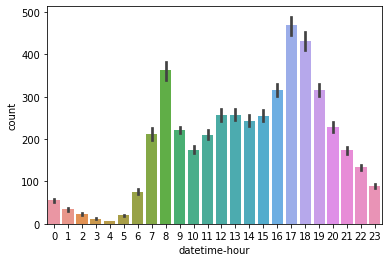

In [13]:
sns.barplot(data=train, x='datetime-hour', y='count', estimator=np.mean)

- 연,월,시는 의미o
- 일,분,초 의미x

### 5) season

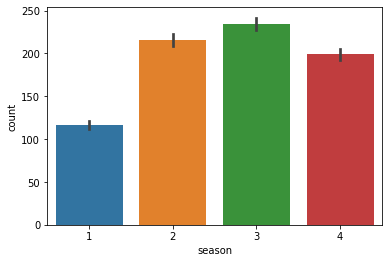

In [14]:
sns.barplot(data=train, x='season', y='count', estimator=np.mean)

### 6) weather

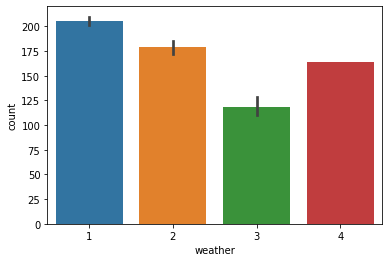

In [15]:
sns.barplot(data=train, x='weather', y='count', estimator=np.mean)

In [16]:
train[train['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0


- 4번 날씨는 1건 뿐이다.

### 주중과 주말 : working day

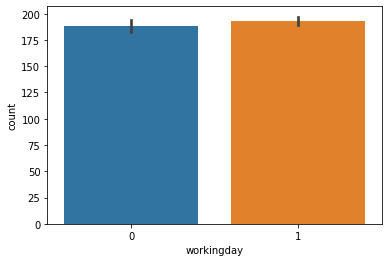

In [17]:
sns.barplot(data=train, x='workingday', y='count', estimator=np.mean)

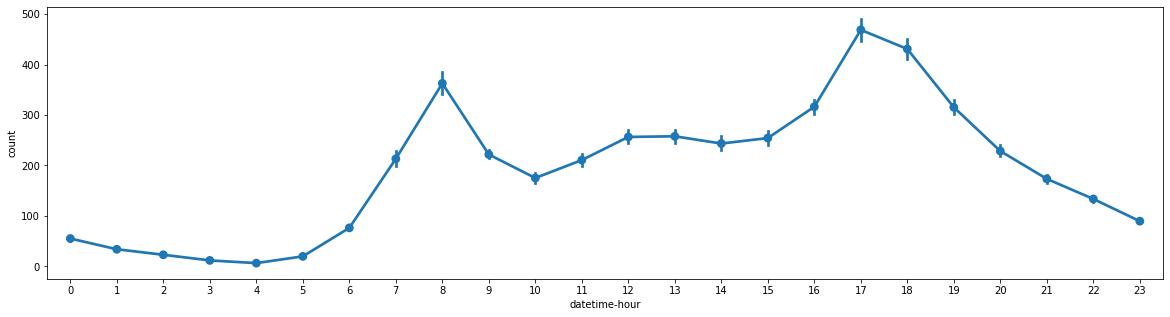

In [18]:
plt.figure(figsize=(20,5))
sns.pointplot(data=train, x='datetime-hour', y='count')

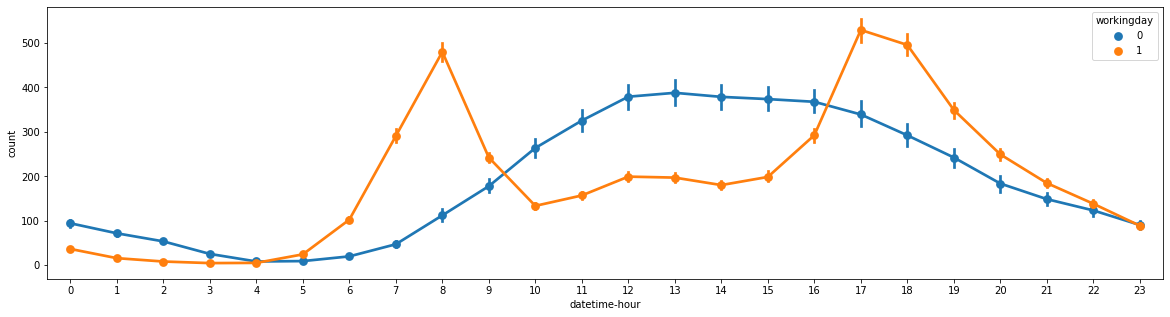

In [19]:
plt.figure(figsize=(20,5))
sns.pointplot(data=train, x='datetime-hour', y='count', hue='workingday')

- 0(주말) 에는 오후에 대여량이 많고
- 1(주중) 에는 출, 퇴근 시간에 대여량이 많다.

In [20]:
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek

In [22]:
train['datetime-dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

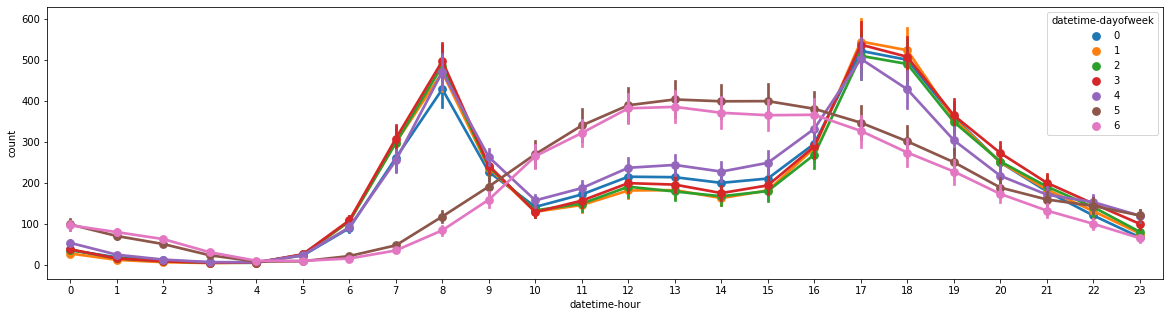

In [24]:
plt.figure(figsize=(20,5))
sns.pointplot(data=train, x='datetime-hour', y='count', hue='datetime-dayofweek')

In [25]:
train_corr = train[['temp','atemp','humidity','windspeed','count']]

In [26]:
train_corr.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


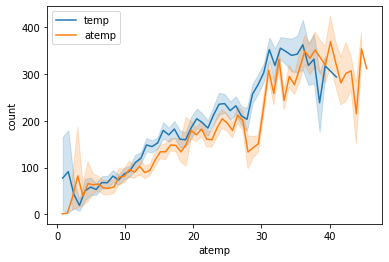

In [27]:
sns.lineplot(data=train,x='temp',y='count', label='temp')
sns.lineplot(data=train,x='atemp',y='count', label='atemp')

In [28]:
train.shape

(10886, 19)

In [29]:
train[train['temp']>=30].shape

(1244, 19)

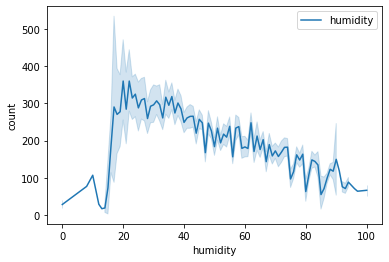

In [31]:
sns.lineplot(data=train,x='humidity',y='count', label='humidity')

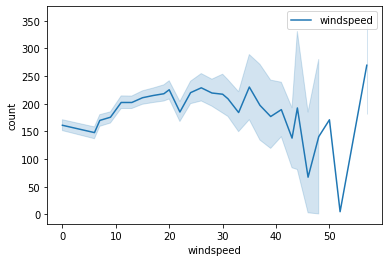

In [32]:
sns.lineplot(data=train,x='windspeed',y='count', label='windspeed')

## 모델링

In [34]:
feature_names = ['season','workingday','weather','temp','atemp','humidity','datetime-year','datetime-month',
                 'datetime-hour','datetime-dayofweek']
train[feature_names]

,season,workingday,weather,temp,atemp,humidity,datetime-year,datetime-month,datetime-hour,datetime-dayofweek
0,1,0,1,9.84,14.395,81,2011,1,0,5
1,1,0,1,9.02,13.635,80,2011,1,1,5
2,1,0,1,9.02,13.635,80,2011,1,2,5
3,1,0,1,9.84,14.395,75,2011,1,3,5
4,1,0,1,9.84,14.395,75,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,19.695,50,2012,12,19,2
10882,4,1,1,14.76,17.425,57,2012,12,20,2
10883,4,1,1,13.94,15.910,61,2012,12,21,2
10884,4,1,1,13.94,17.425,61,2012,12,22,2


In [36]:
X_train = train[feature_names]
y_train = train['count']

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
forest_model = RandomForestRegressor(n_estimators=1000, 
                                     max_depth=7,
                                    min_samples_leaf=15)

In [39]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
# 테스트 데이터 로딩
# 시간 데이터 분할
# train과 동일 feature선택하여 X_test 예측!

In [43]:
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second
test['datetime-dayofweek'] = test['datetime'].dt.dayofweek

In [46]:
X_test = test[feature_names]
y_pred = forest_model.predict(X_test)
y_pred

array([ 13.98171192,   8.17088542,   5.13181037, ..., 140.22948321,
       113.51610944,  82.60745269])